In [13]:
from IPython.display import Image,display
from typing import TypedDict, List
from langgraph.graph import StateGraph,START,END


In [ ]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int

In [ ]:
def Adder(state:AgentState)->AgentState:
    """ this none adds the 2 numbers"""

    state['finalNumber'] = state['number1'] + state['number2']

    return state

def Subtractor(state:AgentState)->AgentState:
    """ this none subtract the 2 numbers"""

    state['finalNumber'] = state['number1'] - state['number2']

    return state

def decide_next_note(state:AgentState) -> AgentState:
    """This note will select the next node of the graph"""

    if state['operation'] == "+":
        return "addition_operation" #returns the edge

    elif state['operation'] == "-":
        return "subtraction_operation"

In [ ]:
graph  = StateGraph(AgentState)

graph.add_node("add_node",Adder)
graph.add_node("subtraction_node",Subtractor)
graph.add_node("router",lambda state:state) #passthrough function
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_note,
    {
        # Edge : Node
        "addition_operation":"add_node",
        "subtraction_operation":"subtraction_node"
    }
)

graph.add_edge("add_node",END)
graph.add_edge("subtraction_node",END)

app = graph.compile()

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
test = AgentState(number1=10 , number2= 5 , operation="+") # type: ignore
app.invoke(test)

# Excercise

In [15]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    number3 : int
    number4 : int
    operation1 : str
    operation2 : str
    finalnumber1 :int
    finalnumber2 : int

In [16]:
def add_node_1(state:AgentState)-> AgentState:
    """This function adds the two nubers """

    state["finalnumber1"] = state["number1"] + state["number2"]
    return state
def add_node_2(state:AgentState)-> AgentState:
    """This function adds the two nubers """

    state["finalnumber2"] = state["number3"] + state["number4"]
    return state

def subtractor_node_1(state:AgentState)-> AgentState:
    """This function subtracts the two nubers """

    state["finalnumber1"] = state["number1"] - state["number2"]
    return state

def subtractor_node_2(state:AgentState)-> AgentState:
    """This function subtracts the two nubers """

    state["finalnumber2"] = state["number3"] - state["number4"]
    return state

def router_node_1(state:AgentState)->AgentState:
    """This function routs to the correct node and returns an edge"""
    if state["operation1"] == "+":
        return "adder_operation1"
    if state["operation1"] == "-":
        return "subtraction_operation1"
    
def router_node_2(state:AgentState)->AgentState:
    """This function routs to the correct node and returns an edge"""
    if state["operation2"] == "+":
        return "adder_operation2"
    if state["operation2"] == "-":
        return "subtraction_operation2"

In [ ]:
graph = StateGraph(AgentState)

graph.add_edge(START,"router1")
graph.add_node("router1",lambda state:state)
graph.add_conditional_edges(
    "router1",
    router_node_1,
    {
        #Edge:node
        "adder_operation1":"adder_node1",
        "subtraction_operation1":"subtraction_node1"
    }
)
graph.add_node("adder_node1",add_node_1)
graph.add_node("subtraction_node1",subtractor_node_1)
graph.add_edge("adder_node1","router2")
graph.add_edge("subtraction_node1","router2")


graph.add_node("router2",lambda state:state) 
graph.add_conditional_edges(
    "router2",
    router_node_2,
    {
        #Edge:node
        "adder_operation2":"adder_node2",
        "subtraction_operation2":"subtraction_node2"
    }
)
graph.add_node("adder_node2",add_node_2)
graph.add_node("subtraction_node2",subtractor_node_2)
graph.add_edge("adder_node2",END)
graph.add_edge("subtraction_node2",END)

app = graph.compile()

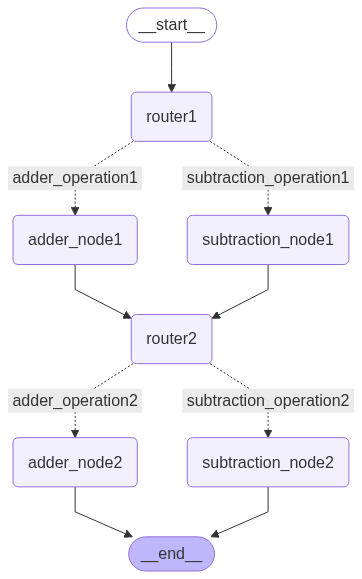

In [20]:
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
test = AgentState(number1 = 10,operation1 = "-",number2 = 5,number3 = 7,number4=2,operation2="+",finalnumber1=0,finalnumber2=0)
app.invoke(test)

{'number1': 10,
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation1': '-',
 'operation2': '+',
 'finalnumber1': 5,
 'finalnumber2': 9}